# Spatiotemporal Analysis of Mortalities due to Respiratory Diseases

This notebook aims to conduct an exploratory data analysis and spatiotemporal analysis on a dataset containing monthly total number of mortalities due to respiratory diseases in each CONUS county from 2003 to 2021. The dataset has the following columns:

- `fips`: FIPS code of each county (integer).
- `Year`: Year of record (integer).
- `Month`: Month of record (integer).
- `Cl_Region`: One of the 9 Climate Regions of CONUS defined by NOAA (categorical).
- `Urban_Level`: One of the six NCHS Urban-Rural Classification Scheme for Counties (categorical).
- `Total_mortality`: Total number of mortalities (integer).

The goal is to identify potential spatial, temporal, or spatiotemporal patterns, hot or cold spots, and other related spatial analyses. Additionally, we'll analyze patterns based on 'Cl_Region' and 'Urban_Level' groupings.

In [79]:
import os
os.chdir('/Users/babak.jfard/projects/NASA_IMERG_Respiratory')


In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from itables import init_notebook_mode
init_notebook_mode(all_interactive=True)

<IPython.core.display.Javascript object>

In [81]:
# Getting the respiratory data from its source to make sure this is working fine
#path_1 = r'/Users/babak.jfard/windows_Files/structure/intel_core_i5/data/interim/resp_2/csv_2003_2021'
#path_2 = r

In [82]:

#import seaborn as sns
# Assuming the dataset is named 'mortalities_data.csv'
df = pd.read_csv('/Users/babak.jfard/windows_Files/structure/intel_core_i5/data/interim/resp/respr_total_all_J.csv')
#/Users/babak.jfard/windows_Files/structure/intel_core_i5/data/interim/resp_2/csv_2003_2021
# Display the first few rows of the dataset
df.head()

Unnamed: 0  County_FIPS  Year_CurrentData  Death_Month  Total
0           0         1001              1999            1      4
1           1         1001              1999            2      3
2           2         1001              1999            3      1
3           3         1001              1999            4      2
4           4         1001              1999            8      1

In [83]:
df.columns = ['Index', 'GEOID', 'Year', 'Month', 'Total_mortality']

In [114]:
df

GEOID  Total_mortality        Date
7        1001                4  01/01/2000
8        1001                5  02/01/2000
9        1001                1  03/01/2000
10       1001                1  05/01/2000
11       1001                1  06/01/2000
...       ...              ...         ...
607985  56045                3  04/01/2021
607986  56045                2  08/01/2021
607987  56045                1  09/01/2021
607988  56045                1  10/01/2021
607989  56045                1  12/01/2021

[582394 rows x 3 columns]

In [119]:
df['Date']=pd.to_datetime(df['Date'])

In [133]:
# Group by 'Date' and sum 'Total_mortality'
monthly_mortality = df.groupby(pd.Grouper(key='Date', freq='M'))['Total_mortality'].sum()

In [134]:
monthly_mortality

Date
2000-01-31    32938
2000-02-29    22190
2000-03-31    19970
2000-04-30    17737
2000-05-31    16947
              ...  
2021-08-31    21022
2021-09-30    20673
2021-10-31    21531
2021-11-30    21813
2021-12-31    24573
Freq: M, Name: Total_mortality, Length: 264, dtype: int64

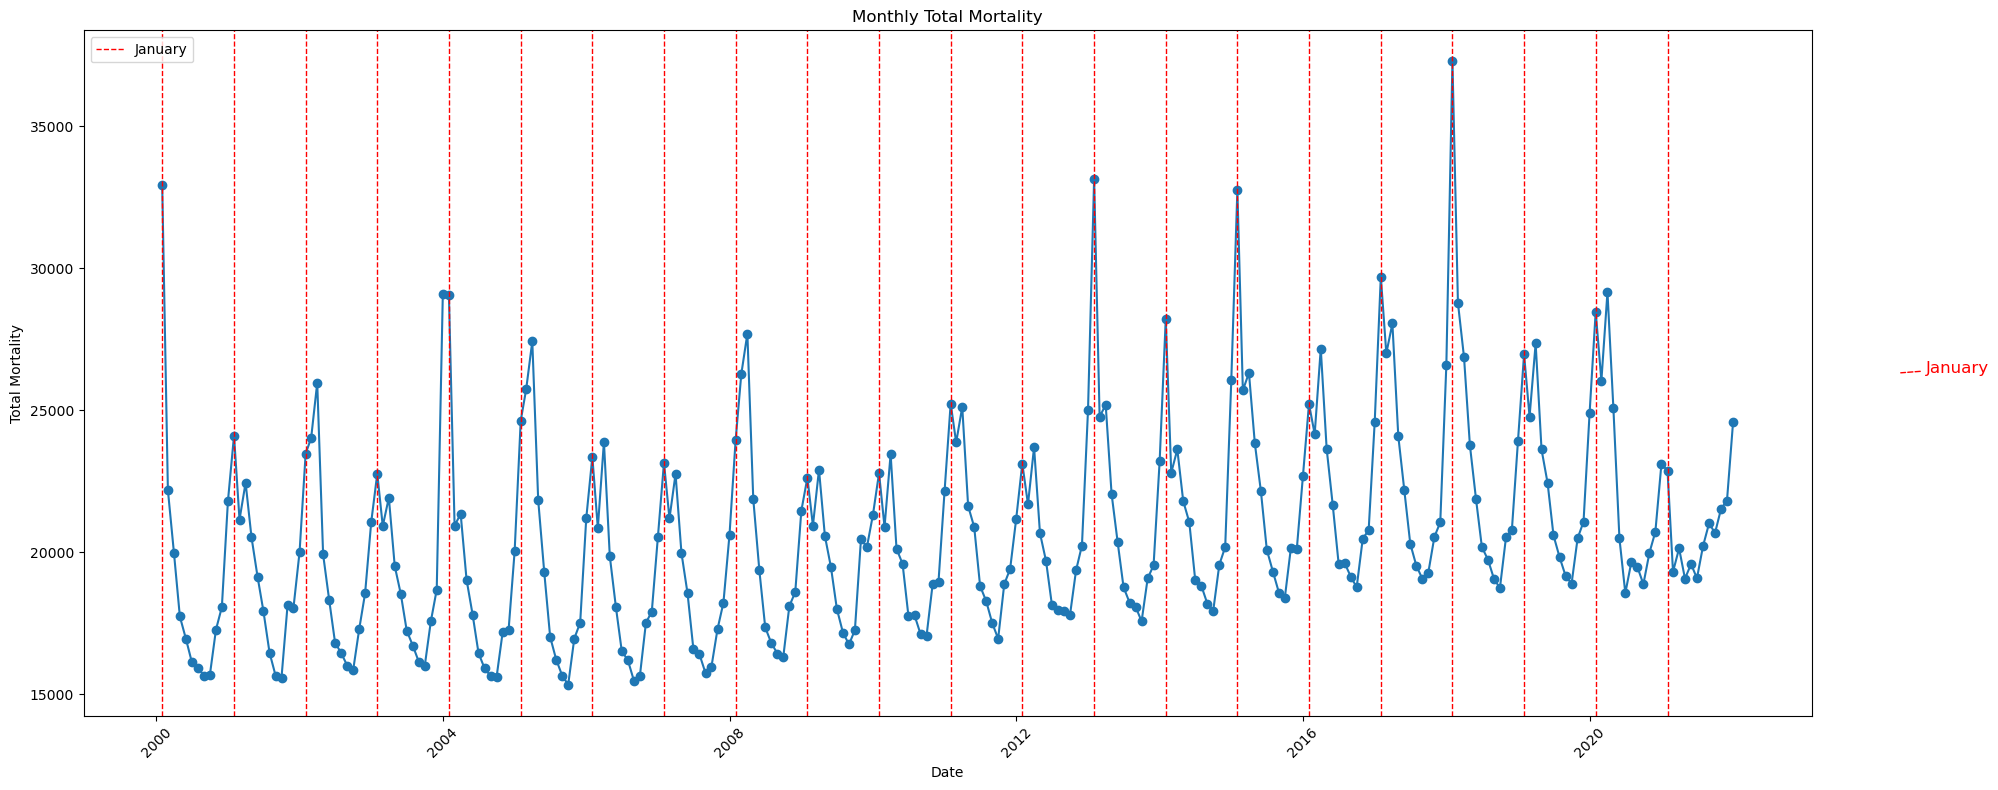

In [126]:
import matplotlib.lines as mlines


# Plotting as before
plt.figure(figsize=(20, 8))
plt.plot(monthly_mortality.index, monthly_mortality.values, marker='o', linestyle='-', label='Total Mortality')

januaries = [date for date in monthly_mortality.index if date.month == 1]

# Adding vertical lines for January
for jan in januaries:
    plt.axvline(x=jan, color='r', linestyle='--', linewidth=1)


# Creating a custom legend for January
january_line = mlines.Line2D([], [], color='red', linestyle='--', linewidth=1, label='January')


# Adding the custom legend to the plot
plt.legend(handles=[january_line], loc='upper left')


# Alternatively, you can directly annotate the plot for a more "note-like" appearance
plt.annotate('January', xy=(1.05, 0.5), xycoords='axes fraction', color='red', fontsize=12,
             xytext=(20, 0), textcoords='offset points',
             arrowprops=dict(arrowstyle="-", color='red', linestyle='--'))


plt.title('Monthly Total Mortality')
plt.xlabel('Date')
plt.ylabel('Total Mortality')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [84]:
# Check for missing values
missing_data = df.isnull().sum()
print(missing_data)
# Summary statistics for numerical columns
df.describe()

# Distribution of data in 'Cl_Region' and 'Urban_Level' columns
# plt.figure(figsize=(12, 6))
# sns.countplot(data=df, x='Cl_Region')
# plt.title('Distribution of Data in Cl_Region Column')
# plt.show()
# plt.figure(figsize=(12, 6))
# sns.countplot(data=df, x='Urban_Level')
# plt.title('Distribution of Data in Urban_Level Column')
# plt.show()

Index              0
GEOID              0
Year               0
Month              0
Total_mortality    0
dtype: int64


Index          GEOID           Year          Month  \
count  607990.000000  607990.000000  607990.000000  607990.000000   
mean   307078.287538   30470.100107    2010.147254       6.442001   
std    175875.032031   15084.760479       6.635152       3.493382   
min         0.000000    1001.000000    1999.000000       1.000000   
25%    155324.250000   18173.000000    2004.000000       3.000000   
50%    307321.500000   29149.000000    2010.000000       6.000000   
75%    459318.750000   45007.000000    2016.000000      10.000000   
max    611316.000000   56045.000000    2021.000000      12.000000   

       Total_mortality  
count    607990.000000  
mean          9.353175  
std          21.059315  
min           1.000000  
25%           1.000000  
50%           3.000000  
75%           8.000000  
max         916.000000

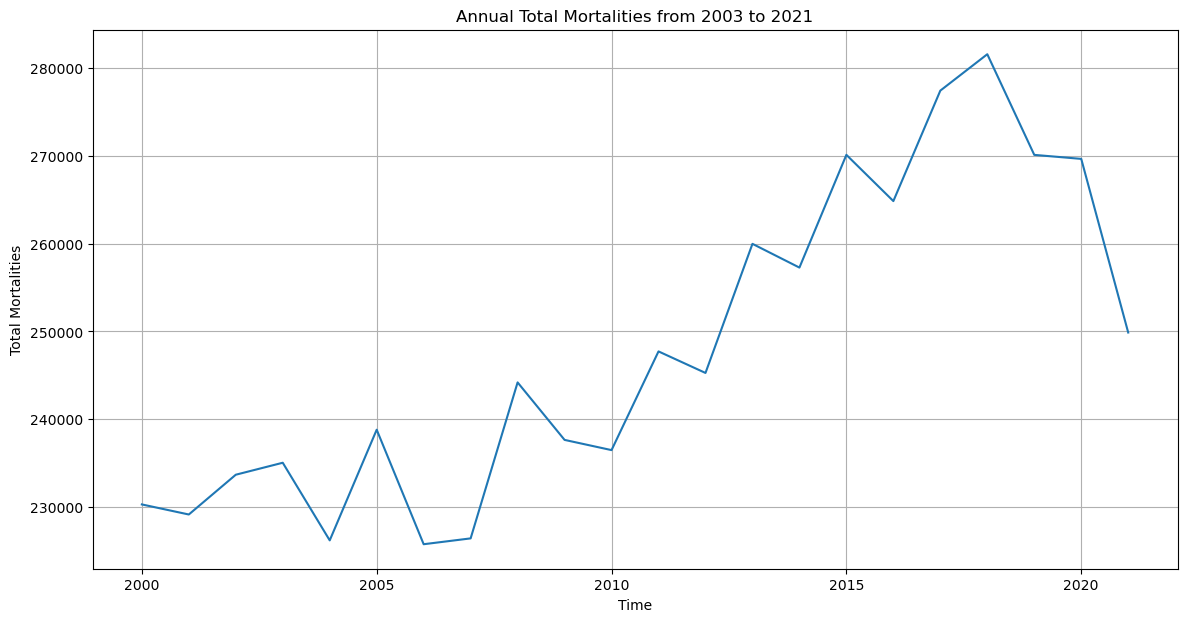

In [141]:
# Spatiotemporal Analysis
# Temporal Analysis: Monthly total mortalities over the years
plt.figure(figsize=(14, 7))
#df.groupby(['Year'])['Total_mortality'].sum().plot()
df.groupby(df['Date'].dt.year)['Total_mortality'].sum().plot()
plt.title('Annual Total Mortalities from 2003 to 2021')
plt.ylabel('Total Mortalities')
plt.xlabel('Time')
plt.grid(True)
plt.show()
# Spatial Analysis: Total mortalities by county (assuming a mapping library is used)
# This is a placeholder and would require a mapping library like Geopandas and a shapefile for counties.
# Spatiotemporal Analysis: Hot or cold spots
# This would require specialized methods or libraries for spatiotemporal hot/cold spot analysis.

In [142]:
df.head()

GEOID  Total_mortality       Date
7    1001                4 2000-01-01
8    1001                5 2000-02-01
9    1001                1 2000-03-01
10   1001                1 2000-05-01
11   1001                1 2000-06-01

In [ ]:
df['Date'] = pd.to_datetime(df[['Year', 'Month']].assign(day=1))
#df['Date'] = df['Date'].dt.strftime('%m/%d/%Y')

In [87]:
df = df.loc[df['Date'] >= '2000-01-01 00:00:00' ]

In [88]:
df['Date'].min()

Timestamp('2000-01-01 00:00:00')

In [89]:
df.drop(['Year', 'Month'], axis=1, inplace=True)


In [90]:
df.drop(['Index'], axis=1, inplace=True)

In [91]:
df.isna().sum()

GEOID              0
Total_mortality    0
Date               0
dtype: int64

In [209]:
df = df[(df['Date'] >= '2003-01-01') & (df['Date'] <= '2021-09-01')].reset_index(drop=True)


In [165]:
df.Date.dt.year.max()

2021

In [92]:
# Change to a format undrestandable for ArcGIS
df['Date'] = df['Date'].dt.strftime('%m/%d/%Y')

In [93]:
df.isna().sum()

GEOID              0
Total_mortality    0
Date               0
dtype: int64

In [95]:
duplicated_rows = df.duplicated(subset=['Date', 'GEOID'])
duplicated_rows.sum()


0

In [97]:
# TODO: This %2 with missing dates need to be looked over again
df.isna().sum()

GEOID              0
Total_mortality    0
Date               0
dtype: int64

In [98]:
df

GEOID  Total_mortality        Date
7        1001                4  01/01/2000
8        1001                5  02/01/2000
9        1001                1  03/01/2000
10       1001                1  05/01/2000
11       1001                1  06/01/2000
...       ...              ...         ...
607985  56045                3  04/01/2021
607986  56045                2  08/01/2021
607987  56045                1  09/01/2021
607988  56045                1  10/01/2021
607989  56045                1  12/01/2021

[582394 rows x 3 columns]

In [100]:
df.Date.max()

'12/01/2021'

In [106]:
Total_df = df.groupby('GEOID')['Total_mortality'].sum().reset_index()


In [110]:
Total_df.Total_mortality

Total_mortality
Loading... (need help?)


In [99]:
df.to_csv('Data/all_counties_respr_mortalities.csv')

In [213]:
# separate mortralities of the states of study
CA_mort =  separate_state(df, 6000, 7000)
GA_mort = separate_state(df, 13000, 14000)
OR_mort= separate_state(df, 41000, 42000)
SC_mort = separate_state(df, 45000, 46000)

In [214]:
CA_mort.to_csv('Data/CA_mort.csv', index=False)
GA_mort.to_csv('Data/GA_mort.csv', index=False)
OR_mort.to_csv('Data/OR_mort.csv', index=False)
SC_mort.to_csv('Data/SC_mort.csv', index=False)

In [220]:
SC_mort.Total_mortality.sum()

77161

# Drought Related Data

WE chose four states after looking into this map


precipitation and soil moisture from our land reanalysis product 2003.1-2021.9.
I’ve processed the percentile daily time series at county level for the requested four states. The datasets include two variables: 1) the root zone soil moisture – based percentiles from our global reanalysis data; 2) the precipitation – based percentiles from the NASA GPM IMERG data. The naming convention of those csv files are:

 

NASALIS_{Variable_name}_percentiles_{STATEFP}_{COUNTYFP}.csv

 

For the explanation and suggested use of the percentile data as an indicator of drought, I would recommend to use the US drought monitor standard [droughtmonitor.unl.edu] for drought categorization since the algorithm we use to convert the original time series to percentiles are based on almost identical strategy except that the reference period is different.

=========================================

**D0 (Abnormally Dry):** This category is used for areas showing signs that drought could be developing or areas that are experiencing short-term dryness but not necessarily in drought. It might correspond to areas in the 21st to 30th percentiles.

**D1 (Moderate Drought):** Areas are experiencing some damage to crops, pastures, and may have water shortages or voluntary water-use restrictions. This might correspond to the 11th to 20th percentiles.

**D2 (Severe Drought):** Crop or pasture losses are likely; water shortages are common; water restrictions may be imposed. This category might correspond to the 6th to 10th percentiles.

**D3 (Extreme Drought):** Major crop and pasture losses; widespread water shortages or restrictions are experienced. This level might correspond to the 3rd to 5th percentiles.

**D4 (Exceptional Drought):** Exceptional and widespread crop/pasture losses; shortages of water in reservoirs, streams, and wells, creating water emergencies. This is typically associated with the 2nd percentile or below.

In [222]:
import os
import pandas as pd

# Path to the data
# path = r'Data/from_Sunjay_Kumar/Precipitation'
path = r'Data/from_Sunjay_Kumar/SoilMoisture'
files = os.listdir(path)

# List to store each DataFrame
dfs = []

for f in files:
    if f.endswith('.csv'):
        # Extract STATEFP and COUNTYFP from the file name
        parts = f.split('_')
        # Assuming the format is 'NASALIS_IMERG_{Variable_name}_percentiles_{STATEFP}_{COUNTYFP}.csv'
        state_fp = parts[3]
        county_fp = parts[4].split('.')[0]  # Split to remove '.csv' and get COUNTYFP
        county_fips = int(state_fp + county_fp)  # Concatenate and convert to integer
        
        # Full path to the file
        file_path = os.path.join(path, f)
        # Read the CSV file
        df = pd.read_csv(file_path)
        # Add the 'county_fips' column
        df['county_fips'] = county_fips
        
        # Append the DataFrame to the list
        dfs.append(df)

# Concatenate all DataFrames in the list
df_drought = pd.concat(dfs, ignore_index=True)
df_drought.rename(columns={'Dates': 'Date'}, inplace=True)
# Display the first few rows of the concatenated DataFrame
print(df_drought.head())

         Date  RZSM Percentiles  county_fips
0  2003-01-01          0.623656        45087
1  2003-01-02          0.425532        45087
2  2003-01-03          0.642105        45087
3  2003-01-04          0.578947        45087
4  2003-01-05          0.515789        45087


In [223]:
# Scenario 1. Using the min values
df_drought['Date'] = pd.to_datetime(df_drought['Date'])
df_drought.set_index('Date', inplace=True)

In [224]:
index_min = df_drought.index.min()
index_max = df_drought.index.max()

print("Minimum index value:", index_min)
print("Maximum index value:", index_max)


Minimum index value: 2003-01-01 00:00:00
Maximum index value: 2021-09-30 00:00:00


In [225]:
df_drought.index.name = None

## Daily to Monthly Conversion Scenarios
The precipitation and rtzsm are daily percentiles while mortality dataset are monthly. To get drought related data into monthly we can consider different scenarios

In [8]:
# Scenario 1. Get the average of monthly percentiles
monthly_data_mean = df_drought.groupby('county_fips').resample('M').mean()

In [226]:
df_drought.index.max()

Timestamp('2021-09-30 00:00:00')

In [227]:
df_drought

RZSM Percentiles  county_fips
2003-01-01          0.623656        45087
2003-01-02          0.425532        45087
2003-01-03          0.642105        45087
2003-01-04          0.578947        45087
2003-01-05          0.515789        45087
...                      ...          ...
2021-09-26          0.978947        45075
2021-09-27          0.968421        45075
2021-09-28          0.936842        45075
2021-09-29          0.904255        45075
2021-09-30          0.881720        45075

[2047552 rows x 2 columns]

In [229]:
#study_variable = 'Precipitation Percentiles'
study_variable = 'RZSM Percentiles'
# Scenario 2. Changing the dataframe into monthly number of days in drought or extreme droughts
# Assuming df_drought is your DataFrame and it's already set with a DateTime index
# Group by 'county_fips' and each month, then calculate both 'drought_days' and 'extreme_days'
result = df_drought.groupby([df_drought['county_fips'], df_drought.index.year, df_drought.index.month])\
    .apply(lambda x: pd.Series({
        'drought_days': (x[study_variable] < 0.3).sum(),
        'extreme_days': (x[study_variable] < 0.05).sum()
    })).reset_index()


In [230]:
# Rename columns for clarity
result.rename(columns={'level_1': 'Year', 'level_2': 'Month'}, inplace=True)

# Create a new Date column for a cleaner index showing year and month, then set it as the new index
result['Date'] = pd.to_datetime(result[['Year', 'Month']].assign(DAY=1))
result.set_index('Date', inplace=True)

# Drop the old 'Year' and 'Month' columns as they are no longer needed
result.drop(['Year', 'Month'], axis=1, inplace=True)

# Assuming 'county_fips' was included in the groupby, you might want to ensure it's a column, not part of the index
result.reset_index(inplace=True)


In [233]:
result['Date'].min()

Timestamp('2003-01-01 00:00:00')

In [234]:
result['Date'] = result['Date'].dt.strftime('%m/%d/%Y')

In [235]:
result.dtypes

Date            object
county_fips      int64
drought_days     int64
extreme_days     int64
dtype: object

In [61]:
# result['county_fips'] = result['county_fips'].astype(str).str.zfill(5)

In [7]:
def separate_state(df, GreaterThan, LessThan):
    state_df = df.loc[(df['GEOID'] > GreaterThan) & (LessThan > df['GEOID'])]
    return(state_df)

In [237]:
result.rename(columns={'county_fips':'GEOID'}, inplace=True)

In [238]:
CA_time =  separate_state(result, 6000, 7000)
GA_time = separate_state(result, 13000, 14000)
OR_time= separate_state(result, 41000, 42000)
SC_time = separate_state(result, 45000, 46000)

In [239]:
# CA_time.to_csv('Data/CA_time.csv')
# GA_time.to_csv('Data/GA_time.csv')
# OR_time.to_csv('Data/OR_time.csv')
# SC_time.to_csv('Data/SC_time.csv')
CA_time.to_csv('Data/CA_rzsm.csv')
GA_time.to_csv('Data/GA_rzsm.csv')
OR_time.to_csv('Data/OR_rzsm.csv')
SC_time.to_csv('Data/SC_rzsm.csv')

In [103]:
SC_time.GEOID.nunique()

46

## Maps
Here I am creating some maps of each of the four considered states separately. The states are:

* California: 06

* Oregon: 41
* Georgia: 13
* South Carolina: 45

In [111]:
import geopandas as gpd

shapefile_path = "/Users/babak.jfard/projects/Datasets/maps/CONUS_counties_2016.zip"
CONUS_counties = gpd.read_file(shapefile_path)


In [112]:
CONUS_counties['GEOID'] = CONUS_counties['GEOID'].astype('int')

In [264]:
CONUS_counties.to_file('CONUS_counties.shp')

In [113]:
# Separating the geopandas of each of the four states
CA = CONUS_counties.loc[(CONUS_counties['GEOID'] > 6000) & (CONUS_counties['GEOID'] < 7000)]
OR = CONUS_counties.loc[(41000 < CONUS_counties['GEOID']) & (CONUS_counties['GEOID'] < 42000)]
GA = CONUS_counties.loc[(13000 < CONUS_counties['GEOID']) & (CONUS_counties['GEOID'] < 14000)]
SC = CONUS_counties.loc[(CONUS_counties['GEOID'] > 45000) & (CONUS_counties['GEOID'] < 46000)]

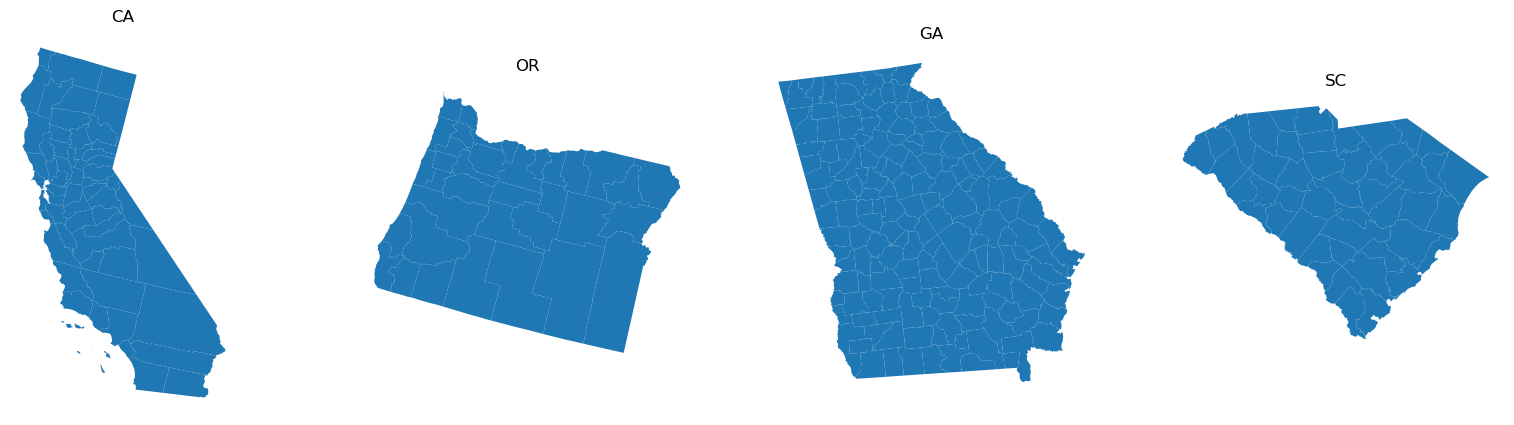

In [114]:
import matplotlib.pyplot as plt

# Create a figure with three subplots in one row
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

# Plot CAOR map
axes[0].set_title('CA')
CA.plot(ax=axes[0])

axes[1].set_title('OR')
OR.plot(ax=axes[1])
# Plot GA map

axes[2].set_title('GA')
GA.plot(ax=axes[2])

# Plot SC map
axes[3].set_title('SC')
SC.plot(ax=axes[3])

# Remove axis labels
for ax in axes:
    ax.set_axis_off()

# Display the plots
plt.show()


In [115]:
CA.dtypes

STATEFP         object
COUNTYFP        object
COUNTYNS        object
AFFGEOID        object
GEOID            int64
NAME            object
LSAD            object
ALAND          float64
AWATER         float64
Shape_Leng     float64
Shape_Area     float64
geometry      geometry
dtype: object

In [116]:
CA.to_file("CA_Counties.shp")


In [90]:
OR.to_file("OR_Counties.shp")
GA.to_file("GA_Counties.shp")
SC.to_file("SC_Counties.shp")

# PM2.5
Here, I extract PM2.5 datasets for 01/10/2003 to 09/01/2019

In [2]:
import os
os.chdir('/Users/babak.jfard/projects/NASA_IMERG_Respiratory')


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from itables import init_notebook_mode
init_notebook_mode(all_interactive=True)

<IPython.core.display.Javascript object>

In [66]:
PM25_path = r'/Volumes/Extreme SSD/Work_projects/Health_Airpollution/data/processed/all_PM25.csv'
PM25 = pd.read_csv(PM25_path)

In [67]:
PM25.isna().sum()

GEOID        0
PM25_mean    0
PM25_std     0
PM25_max     0
year         0
month        0
dtype: int64

In [68]:
PM25.year.max()

2018

In [69]:
PM25['Date'] = pd.to_datetime(PM25[['year', 'month']].assign(day=1))

In [70]:
PM25['Date'].min()

Timestamp('2000-01-01 00:00:00')

In [71]:
PM25 = PM25.loc[PM25['Date'] >= '2003-01-01']

In [72]:
PM25.drop(['PM25_mean', 'PM25_std', 'year', 'month'], axis=1, inplace=True)

In [73]:
PM25['Date'] = PM25['Date'].dt.strftime('%m/%d/%Y')

In [74]:
PM25.isna().sum()

GEOID       0
PM25_max    0
Date        0
dtype: int64

In [75]:
CA_PM25 =  separate_state(PM25, 6000, 7000).reset_index(drop=True)
GA_PM25 = separate_state(PM25, 13000, 14000).reset_index(drop=True)
OR_PM25= separate_state(PM25, 41000, 42000).reset_index(drop=True)
SC_PM25 = separate_state(PM25, 45000, 46000).reset_index(drop=True)

In [76]:
print(CA_PM25.isna().sum())
print(GA_PM25.isna().sum())
print(OR_PM25.isna().sum())
print(SC_PM25.isna().sum())

GEOID       0
PM25_max    0
Date        0
dtype: int64
GEOID       0
PM25_max    0
Date        0
dtype: int64
GEOID       0
PM25_max    0
Date        0
dtype: int64
GEOID       0
PM25_max    0
Date        0
dtype: int64


In [77]:
CA_PM25.to_csv('Data/CA_PM25_2003_2018.csv', index=False)
GA_PM25.to_csv('Data/GA_PM25_2003_2018.csv', index=False)
OR_PM25.to_csv('Data/OR_PM25_2003_2018.csv', index=False)
SC_PM25.to_csv('Data/SC_PM25_2003_2018.csv', index=False)